In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
sns.set_theme(context='paper', style='whitegrid', palette='GnBu_r')

In [25]:
df = pd.read_csv('synthetic_data.csv')
df

,customer_id,age,gender,household_size,annual_income,cleaning_frequency,willingness_to_adopt_robotics,preferred_features,customer_satisfaction
0,0,31,Female,2,75934,Twice a week,Medium,UV-C Sterilization,4.6
1,1,22,Female,1,28000,Twice a week,High,Voice Control,5.0
2,2,40,Female,1,28000,Weekly,Low,App Connectivity,2.7
3,3,32,Female,1,66210,Every few days,High,Smart Home Integration,3.7
4,4,41,Female,2,61485,Twice a week,Medium,Auto Scheduling,2.9
...,...,...,...,...,...,...,...,...,...
1995,1995,22,Male,1,28000,Every few days,High,Self-charging,3.1
1996,1996,22,Female,1,94174,Daily,Medium,Smart Home Integration,3.9
1997,1997,55,Male,2,35218,Every few days,High,Allergen Filtration,3.5
1998,1998,22,Female,1,118647,Weekly,High,Noise Levels,4.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    2000 non-null   int64  
 1   age                            2000 non-null   int64  
 2   gender                         2000 non-null   object 
 3   household_size                 2000 non-null   int64  
 4   annual_income                  2000 non-null   int64  
 5   cleaning_frequency             2000 non-null   object 
 6   willingness_to_adopt_robotics  2000 non-null   object 
 7   preferred_features             2000 non-null   object 
 8   customer_satisfaction          2000 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [27]:
df.describe()

,customer_id,age,household_size,annual_income,customer_satisfaction
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,37.637500,1.695000,65722.152000,3.871600
std,577.494589,15.977288,1.177994,41844.411923,0.820305
min,0.000000,22.000000,1.000000,28000.000000,2.200000
25%,499.750000,22.000000,1.000000,28000.000000,3.300000
50%,999.500000,34.000000,1.000000,51016.000000,3.900000
75%,1499.250000,50.000000,2.000000,97936.750000,4.600000
max,1999.000000,70.000000,5.000000,150000.000000,5.000000


In [29]:
df.select_dtypes([np.number]).columns.values

array(['customer_id', 'age', 'household_size', 'annual_income',
       'customer_satisfaction'], dtype=object)

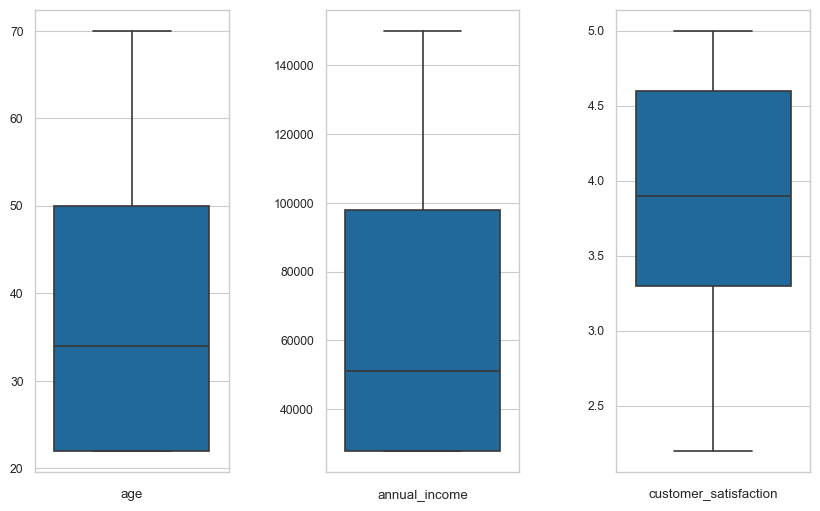

In [34]:
cols = ['age', 'annual_income', 'customer_satisfaction']

# initialize figure with subplots in a row
fig, ax = plt.subplots(1, len(cols), figsize=(10, 6))

# add padding between the subplots
plt.subplots_adjust(wspace=0.5) 

for idx, col in enumerate(cols):
    sns.boxplot(data=df[col], ax=ax[idx])
    ax[idx].set_xlabel(col)
    
# by default, x-tick label set to 0 in each subplot
# removing it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

D:\workspaces\python-workspace\Winter-2024\WIL-project\AIMT_Group_2-Home_Cleaning_Robots\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


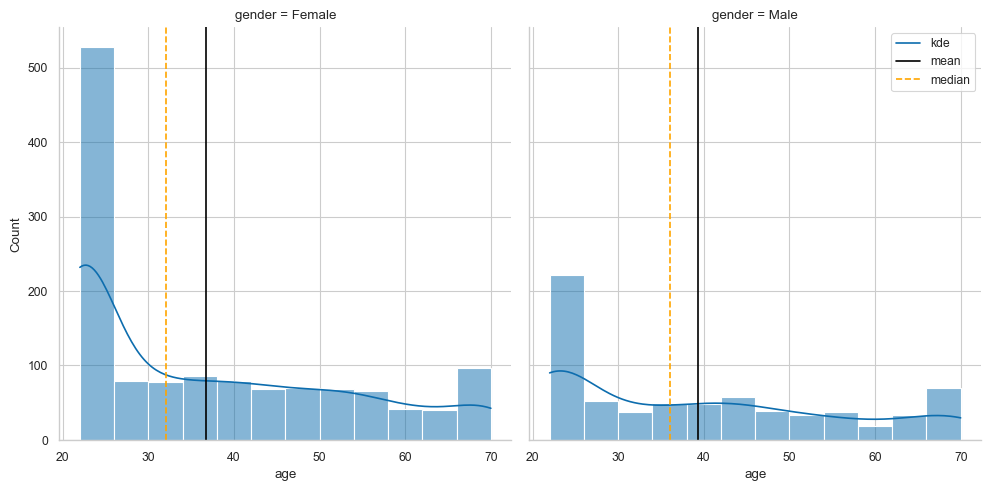

In [5]:
fig = sns.displot(df, x='age', col='gender', kde=True)

def specs(x, **kwargs):
    plt.axvline(x.mean(), c='k', ls='-')
    plt.axvline(x.median(), c='orange', ls='--')

fig.map(specs,'age' )

plt.legend(['kde', 'mean', 'median'])
plt.show()

D:\workspaces\python-workspace\Winter-2024\WIL-project\AIMT_Group_2-Home_Cleaning_Robots\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


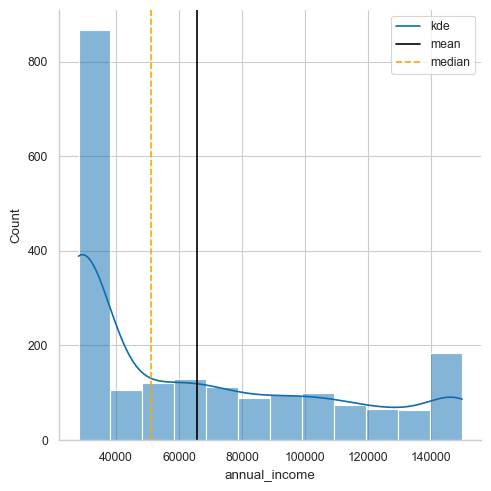

In [21]:
fig = sns.displot(df, x='annual_income', kde=True)

def specs(x, **kwargs):
    plt.axvline(x.mean(), c='k', ls='-')
    plt.axvline(x.median(), c='orange', ls='--')

fig.map(specs,'annual_income' )

plt.legend(['kde', 'mean', 'median'])
plt.show()

D:\workspaces\python-workspace\Winter-2024\WIL-project\AIMT_Group_2-Home_Cleaning_Robots\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


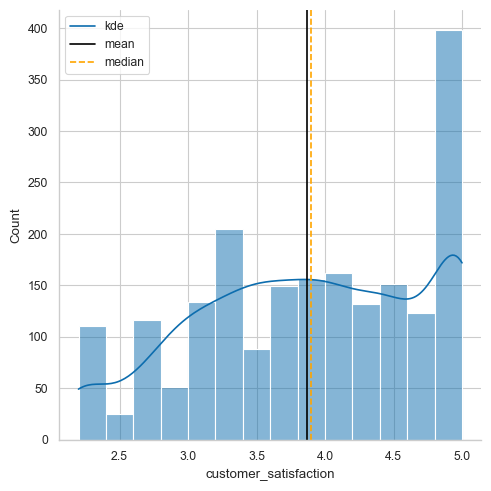

In [7]:
fig = sns.displot(df, x='customer_satisfaction', kde=True)

def specs(x, **kwargs):
    plt.axvline(x.mean(), c='k', ls='-')
    plt.axvline(x.median(), c='orange', ls='--')

fig.map(specs,'customer_satisfaction' )

plt.legend(['kde', 'mean', 'median'])
plt.show()

In [8]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

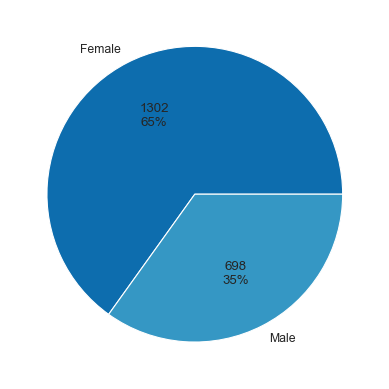

In [9]:
df.groupby('gender').size().plot(kind='pie', autopct=label_function)
plt.show()

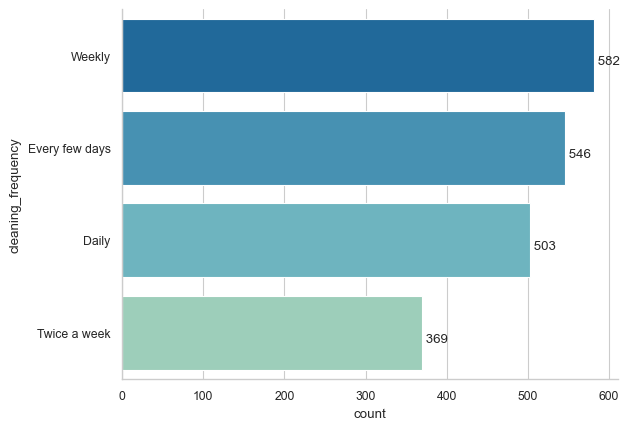

In [10]:
ax = sns.countplot(y = 'cleaning_frequency',
              data = df,
              order = df['cleaning_frequency'].value_counts().index)
sns.despine()

initialx = 0
for p in ax.patches:
    ax.text(x=p.get_width(), y=initialx + p.get_height()/8, s=' {:1.0f}'.format(p.get_width()))
    initialx += 1

plt.show()

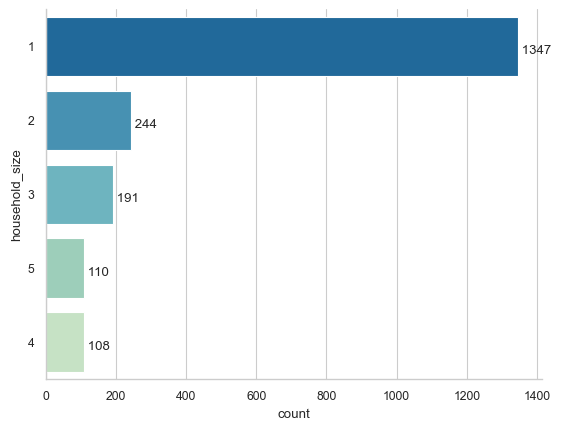

In [11]:
ax = sns.countplot(y = 'household_size',
              data = df,
              order = df['household_size'].value_counts().index)
sns.despine()

initialx = 0
for p in ax.patches:
    ax.text(x=p.get_width(), y=initialx + p.get_height()/8, s=' {:1.0f}'.format(p.get_width()))
    initialx += 1

plt.show()

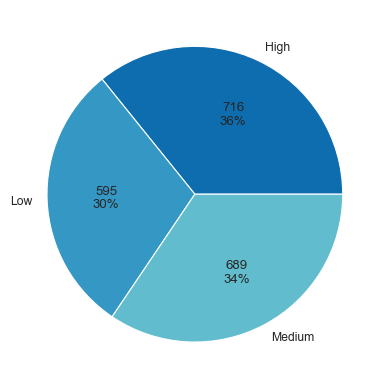

In [12]:
df.groupby('willingness_to_adopt_robotics').size().plot(kind='pie', autopct=label_function)
plt.show()

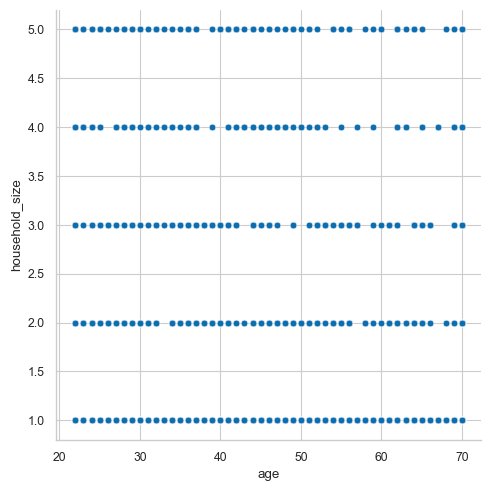

In [13]:
sns.relplot(data=df, x='age', y='household_size')
plt.show()

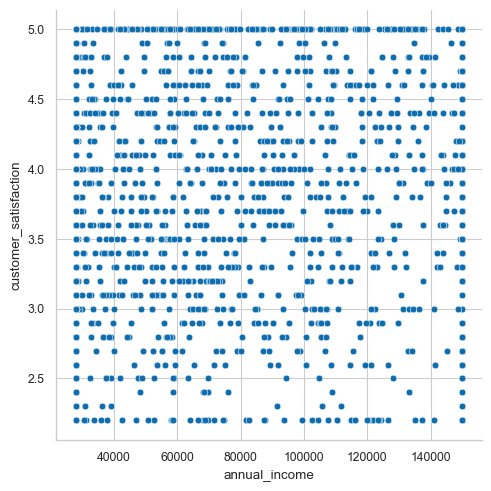

In [14]:
sns.relplot(data=df, x='annual_income', y='customer_satisfaction')
plt.show()

In [16]:
from ydata_profiling import ProfileReport

In [17]:
profile = ProfileReport(df, title='EDA')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]